<a href="https://colab.research.google.com/github/Prerna99-star/NLP-codes-and-basic-notes/blob/master/Box_Cox_Power_Trsansformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
datasets = pd.read_csv("SMSSpamCollection.tsv", sep = '\t')
datasets.columns =['label', 'body_text']

Create feature for text message length

In [2]:
datasets['body_length'] = datasets['body_text'].apply(lambda x: len(x)-x.count(" "))
datasets.head()

,label,body_text,body_length
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


Create feature for % of text i.e. punctuations

In [7]:
import string
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100

datasets['punctuation_count'] = datasets['body_text'].apply(lambda x: count_punct(x))
datasets.head()

,label,body_text,body_length,punctuation_count
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


Evaluation of created feature

In [0]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline 

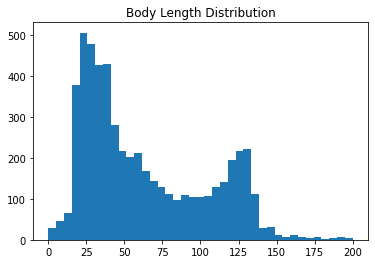

In [15]:
bins = np.linspace(0, 200, 40)
pyplot.hist(datasets['body_length'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

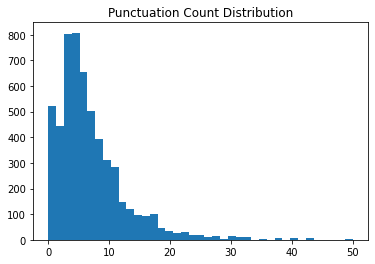

In [16]:
bins = np.linspace(0, 50, 40)
pyplot.hist(datasets['punctuation_count'], bins)
pyplot.title("Punctuation Count Distribution")
pyplot.show()

Box-Cox Power TRANSFORMATION

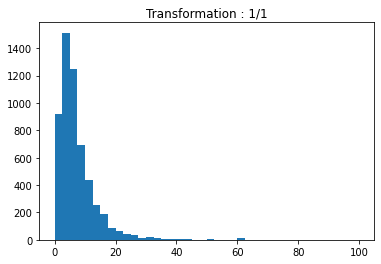

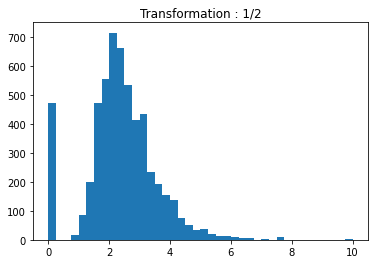

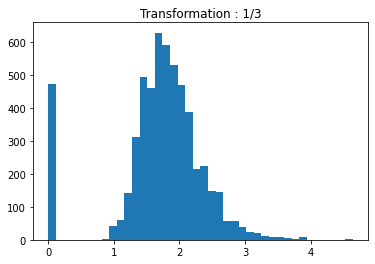

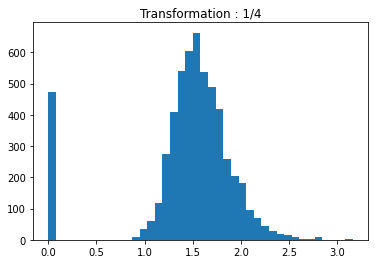

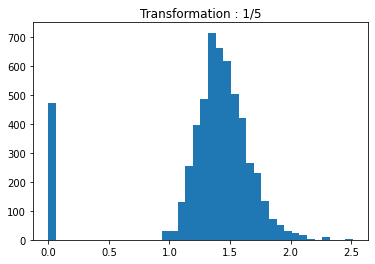

In [19]:
for i in [1, 2, 3, 4, 5]:
  pyplot.hist((datasets['punctuation_count'])**(1/i), bins = 40)
  pyplot.title(("Transformation : 1/{}").format(str(i)))
  pyplot.show()